# Importing required libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = "../data/mathco/"
train_url = data_url + "train.csv"
test_url = data_url + "test.csv"

In [3]:
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

# EDA on train dataset

In [4]:
df_train.drop_duplicates(inplace=True)

In [5]:
df_train.set_index('ID', inplace=True)

In [6]:
df_train.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
df_train.shape

(18924, 17)

In [8]:
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: int(x[:-2]))

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-nu

In [10]:
df_train.sort_values("Price", ascending=False)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45812886,26307500,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,Left wheel,Blue,0
45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
45795524,627220,-,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
45810285,308906,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12
45229113,297930,-,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0 Turbo,20000,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45612423,3,-,HYUNDAI,Elantra,2011,Sedan,Yes,Petrol,1.8,80000,4.0,Tiptronic,Front,04-May,Left wheel,Grey,6
45788811,3,-,MERCEDES-BENZ,CLK 230,2004,Coupe,Yes,Petrol,2.3,328000,4.0,Manual,Rear,02-Mar,Left wheel,Blue,0
45470589,3,-,MERCEDES-BENZ,C 220,1998,Sedan,No,Diesel,2.2,20600,4.0,Manual,Rear,04-May,Left wheel,Black,2


In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_res = df[~((df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR))]
    return df_res

In [12]:
#df_unmod = df_train.copy()

## Object data

In [13]:
df_obj = df_train.select_dtypes(include='object').copy()

In [14]:
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
ID,,,,,,,,,,,,
45654403,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,Automatic,4x4,04-May,Left wheel,Silver
44731507,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,Tiptronic,4x4,04-May,Left wheel,Black
45774419,-,HONDA,FIT,Hatchback,No,Petrol,1.3,Variator,Front,04-May,Right-hand drive,Black
45769185,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,Automatic,4x4,04-May,Left wheel,White
45809263,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,Automatic,Front,04-May,Left wheel,Silver


#### Levy

In [15]:
df_obj.Levy.value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
681        1
3208       1
1590       1
2908       1
972        1
Name: Levy, Length: 559, dtype: int64

In [16]:
df_train.groupby(['Levy'])['Price'].mean().sort_values(ascending=False)

Levy
2067    449958.5
2269    288521.0
2819    175622.0
1951    128188.5
3057    121524.0
          ...   
2472       314.0
1297       314.0
1279       150.0
2278       125.0
2308        33.0
Name: Price, Length: 559, dtype: float64

In [17]:
map_levy = dict(df_train.groupby(['Levy'])['Price'].mean()/1e4)

df_obj.Levy = df_obj.Levy.map(map_levy)

In [18]:
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
ID,,,,,,,,,,,,
45654403,0.707867,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,Automatic,4x4,04-May,Left wheel,Silver
44731507,1.142824,CHEVROLET,Equinox,Jeep,No,Petrol,3,Tiptronic,4x4,04-May,Left wheel,Black
45774419,2.150699,HONDA,FIT,Hatchback,No,Petrol,1.3,Variator,Front,04-May,Right-hand drive,Black
45769185,1.181298,FORD,Escape,Jeep,Yes,Hybrid,2.5,Automatic,4x4,04-May,Left wheel,White
45809263,1.956810,HONDA,FIT,Hatchback,Yes,Petrol,1.3,Automatic,Front,04-May,Left wheel,Silver


#### Manufacturer

Ordinal encoding the Manufacturer column in order of the mean price for each brand

In [19]:
df_train.groupby(['Manufacturer'])['Price'].mean().sort_values(ascending=False)

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73474.893939
FERRARI         66955.500000
LAND ROVER      54807.187500
                   ...      
VAZ              4659.893617
MOSKVICH         4609.000000
ZAZ              3822.500000
ROVER            2433.333333
ROLLS-ROYCE       178.500000
Name: Price, Length: 65, dtype: float64

In [20]:
map_manufac = dict(df_train.groupby(['Manufacturer'])['Price'].mean()/1000)

df_obj.Manufacturer = df_obj.Manufacturer.map(map_manufac)

In [21]:
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
ID,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,Jeep,Yes,Hybrid,3.5,Automatic,4x4,04-May,Left wheel,Silver
44731507,1.142824,14.894874,Equinox,Jeep,No,Petrol,3,Tiptronic,4x4,04-May,Left wheel,Black
45774419,2.150699,14.162074,FIT,Hatchback,No,Petrol,1.3,Variator,Front,04-May,Right-hand drive,Black
45769185,1.181298,15.411850,Escape,Jeep,Yes,Hybrid,2.5,Automatic,4x4,04-May,Left wheel,White
45809263,1.956810,14.162074,FIT,Hatchback,Yes,Petrol,1.3,Automatic,Front,04-May,Left wheel,Silver


#### Model

In [22]:
df_obj.Model.value_counts()

Prius        1069
Sonata       1067
Camry         929
Elantra       910
E 350         534
             ... 
Lancer GT       1
Allante         1
216             1
Rodeo           1
S 420           1
Name: Model, Length: 1590, dtype: int64

In [23]:
df_train.groupby(['Model'])['Price'].mean()

Model
09-Mar       6920.000000
100         12819.000000
100 NX       5331.000000
1000         3620.176471
1111         4000.000000
               ...      
kona        45473.000000
macan      109450.000000
macan S    103178.000000
tC          19233.666667
xD          14531.000000
Name: Price, Length: 1590, dtype: float64

Ignoring Model under the assumption that model doesn't influence the price as much

#### Category

In [24]:
df_obj.Category.value_counts()

Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

In [25]:
map_category = dict(df_train.groupby(['Category'])['Price'].mean()/1e4)

df_obj.Category = df_obj.Category.map(map_category)

In [26]:
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
ID,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,2.376051,Yes,Hybrid,3.5,Automatic,4x4,04-May,Left wheel,Silver
44731507,1.142824,14.894874,Equinox,2.376051,No,Petrol,3,Tiptronic,4x4,04-May,Left wheel,Black
45774419,2.150699,14.162074,FIT,1.135461,No,Petrol,1.3,Variator,Front,04-May,Right-hand drive,Black
45769185,1.181298,15.411850,Escape,2.376051,Yes,Hybrid,2.5,Automatic,4x4,04-May,Left wheel,White
45809263,1.956810,14.162074,FIT,1.135461,Yes,Petrol,1.3,Automatic,Front,04-May,Left wheel,Silver


#### Leather interior

In [27]:
df_obj['Leather interior'].value_counts()

Yes    13731
No      5193
Name: Leather interior, dtype: int64

In [28]:
map_leather = {'Yes': 1, 'No': 0}

df_obj['Leather interior'] = df_obj['Leather interior'].map(map_leather)

#### Fuel type

In [29]:
df_obj['Fuel type'].value_counts()

Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

In [30]:
df_train.groupby(['Fuel type'])['Price'].mean()

Fuel type
CNG                8186.859275
Diesel            30684.792802
Hybrid            10845.476688
Hydrogen          20385.000000
LPG               13320.505085
Petrol            17391.153459
Plug-in Hybrid    23650.917647
Name: Price, dtype: float64

In [31]:
map_fuel = dict(df_train.groupby(['Fuel type'])['Price'].mean()/10000)

df_obj['Fuel type'] = df_obj['Fuel type'].map(map_fuel)
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
ID,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,2.376051,1,1.084548,3.5,Automatic,4x4,04-May,Left wheel,Silver
44731507,1.142824,14.894874,Equinox,2.376051,0,1.739115,3,Tiptronic,4x4,04-May,Left wheel,Black
45774419,2.150699,14.162074,FIT,1.135461,0,1.739115,1.3,Variator,Front,04-May,Right-hand drive,Black
45769185,1.181298,15.411850,Escape,2.376051,1,1.084548,2.5,Automatic,4x4,04-May,Left wheel,White
45809263,1.956810,14.162074,FIT,1.135461,1,1.739115,1.3,Automatic,Front,04-May,Left wheel,Silver


#### Engine volume

In [32]:
df_obj['Engine volume'].value_counts()

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
0.3 Turbo       1
6.7             1
0.5             1
3.1             1
0.8 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [33]:
def return_turbo(col):
    s = list(col)
    res = []
    for x in s:
        if len(x.split()) == 2:
            res.append(1)
        else:
            res.append(0)
    return res

In [34]:
df_obj['Turbo'] = return_turbo(df_obj['Engine volume'])

In [35]:
def conv(x):
    return float(x.split()[0])

In [36]:
df_obj['Engine volume'] = df_obj['Engine volume'].apply(conv)

In [37]:
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
ID,,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,2.376051,1,1.084548,3.5,Automatic,4x4,04-May,Left wheel,Silver,0
44731507,1.142824,14.894874,Equinox,2.376051,0,1.739115,3.0,Tiptronic,4x4,04-May,Left wheel,Black,0
45774419,2.150699,14.162074,FIT,1.135461,0,1.739115,1.3,Variator,Front,04-May,Right-hand drive,Black,0
45769185,1.181298,15.411850,Escape,2.376051,1,1.084548,2.5,Automatic,4x4,04-May,Left wheel,White,0
45809263,1.956810,14.162074,FIT,1.135461,1,1.739115,1.3,Automatic,Front,04-May,Left wheel,Silver,0


#### Gear box type

In [38]:
df_obj['Gear box type'].value_counts()

Automatic    13282
Tiptronic     3065
Manual        1844
Variator       733
Name: Gear box type, dtype: int64

In [39]:
df_train.groupby(['Gear box type'])['Price'].mean()

Gear box type
Automatic    16004.732495
Manual       25865.434924
Tiptronic    26313.582708
Variator     14770.497954
Name: Price, dtype: float64

In [40]:
map_gear = dict(df_train.groupby(['Gear box type'])['Price'].mean()/1e4)
df_obj['Gear box type'] = df_obj['Gear box type'].map(map_gear)
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
ID,,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,2.376051,1,1.084548,3.5,1.600473,4x4,04-May,Left wheel,Silver,0
44731507,1.142824,14.894874,Equinox,2.376051,0,1.739115,3.0,2.631358,4x4,04-May,Left wheel,Black,0
45774419,2.150699,14.162074,FIT,1.135461,0,1.739115,1.3,1.477050,Front,04-May,Right-hand drive,Black,0
45769185,1.181298,15.411850,Escape,2.376051,1,1.084548,2.5,1.600473,4x4,04-May,Left wheel,White,0
45809263,1.956810,14.162074,FIT,1.135461,1,1.739115,1.3,1.600473,Front,04-May,Left wheel,Silver,0


#### Drive wheels

In [41]:
df_obj['Drive wheels'].value_counts()

Front    12695
4x4       3969
Rear      2260
Name: Drive wheels, dtype: int64

In [42]:
df_train.groupby(['Drive wheels'])['Price'].mean()

Drive wheels
4x4      19580.303351
Front    18503.025443
Rear     17317.917257
Name: Price, dtype: float64

In [43]:
map_drive = dict(df_train.groupby(['Drive wheels'])['Price'].mean()/1e4)
df_obj['Drive wheels'] = df_obj['Drive wheels'].map(map_drive)

#### Doors

In [44]:
df_obj['Doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [45]:
df_train.groupby(['Doors'])['Price'].mean()

Doors
02-Mar    50793.735677
04-May    17192.917924
>5        21905.967742
Name: Price, dtype: float64

In [46]:
map_doors = dict(df_train.groupby(['Doors'])['Price'].mean()/1e4)
df_obj['Doors'] = df_obj['Doors'].map(map_doors)

#### Wheel

In [47]:
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
ID,,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,2.376051,1,1.084548,3.5,1.600473,1.958030,1.719292,Left wheel,Silver,0
44731507,1.142824,14.894874,Equinox,2.376051,0,1.739115,3.0,2.631358,1.958030,1.719292,Left wheel,Black,0
45774419,2.150699,14.162074,FIT,1.135461,0,1.739115,1.3,1.477050,1.850303,1.719292,Right-hand drive,Black,0
45769185,1.181298,15.411850,Escape,2.376051,1,1.084548,2.5,1.600473,1.958030,1.719292,Left wheel,White,0
45809263,1.956810,14.162074,FIT,1.135461,1,1.739115,1.3,1.600473,1.850303,1.719292,Left wheel,Silver,0


In [48]:
df_obj.Wheel.value_counts()

Left wheel          17471
Right-hand drive     1453
Name: Wheel, dtype: int64

In [49]:
df_train.groupby(['Wheel'])['Price'].mean()

Wheel
Left wheel          19394.079675
Right-hand drive     8888.271851
Name: Price, dtype: float64

In [50]:
map_wheel = {'Left wheel': 2, 'Right-hand drive': 1}
df_obj['Wheel'] = df_obj['Wheel'].map(map_wheel)

#### Color

In [51]:
df_obj.Color.value_counts()

Black            4944
White            4407
Silver           3729
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian red     177
Golden            143
Beige             134
Sky blue          122
Yellow            105
Purple             39
Pink               25
Name: Color, dtype: int64

In [52]:
df_train.groupby(['Color'])['Price'].mean()

Color
Beige            15627.559701
Black            18915.184466
Blue             34030.468023
Brown            19873.551351
Carnelian red    15908.887006
Golden           14529.006993
Green             9477.894081
Grey             19242.446436
Orange           13026.444444
Pink             10598.360000
Purple            8837.384615
Red              13645.670418
Silver           15122.033253
Sky blue         14079.000000
White            18141.962786
Yellow           20715.561905
Name: Price, dtype: float64

In [53]:
map_color = dict(df_train.groupby(['Color'])['Price'].mean()/1e4)
df_obj['Color'] = df_obj['Color'].map(map_color)
df_obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
ID,,,,,,,,,,,,,
45654403,0.707867,20.052594,RX 450,2.376051,1,1.084548,3.5,1.600473,1.958030,1.719292,2,1.512203,0
44731507,1.142824,14.894874,Equinox,2.376051,0,1.739115,3.0,2.631358,1.958030,1.719292,2,1.891518,0
45774419,2.150699,14.162074,FIT,1.135461,0,1.739115,1.3,1.477050,1.850303,1.719292,1,1.891518,0
45769185,1.181298,15.411850,Escape,2.376051,1,1.084548,2.5,1.600473,1.958030,1.719292,2,1.814196,0
45809263,1.956810,14.162074,FIT,1.135461,1,1.739115,1.3,1.600473,1.850303,1.719292,2,1.512203,0


In [54]:
df_obj.drop(columns=['Model'], inplace=True)

In [55]:
df_obj.head(10)

,Levy,Manufacturer,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
ID,,,,,,,,,,,,
45654403,0.707867,20.052594,2.376051,1,1.084548,3.5,1.600473,1.958030,1.719292,2,1.512203,0
44731507,1.142824,14.894874,2.376051,0,1.739115,3.0,2.631358,1.958030,1.719292,2,1.891518,0
45774419,2.150699,14.162074,1.135461,0,1.739115,1.3,1.477050,1.850303,1.719292,1,1.891518,0
45769185,1.181298,15.411850,2.376051,1,1.084548,2.5,1.600473,1.958030,1.719292,2,1.814196,0
45809263,1.956810,14.162074,1.135461,1,1.739115,1.3,1.600473,1.850303,1.719292,2,1.512203,0
45802912,2.750153,22.306001,2.376051,1,3.068479,2.0,1.600473,1.850303,1.719292,2,1.814196,0
45656768,0.814299,14.302448,1.135461,1,1.084548,1.8,1.600473,1.850303,1.719292,2,1.814196,0
45816158,1.082160,22.306001,1.420273,1,1.739115,2.4,1.600473,1.850303,1.719292,2,1.924245,0
45641395,0.650313,14.302448,1.420273,1,1.084548,2.5,1.600473,1.850303,1.719292,2,1.891518,0


In [56]:
df_obj.shape

(18924, 12)

## Numerical data

In [57]:
df_num = df_train.select_dtypes(exclude='object').copy()

Removing Outliers

In [58]:
#df_num = remove_outliers_iqr(df_num,'Price')
#df_num = remove_outliers_iqr(df_num,'Mileage')

In [59]:
df_num.describe()

,Price,Prod. year,Mileage,Cylinders,Airbags
count,1.892400e+04,18924.000000,1.892400e+04,18924.000000,18924.000000
mean,1.858744e+04,2010.914236,1.555373e+06,4.580216,6.568379
std,1.921356e+05,5.665749,4.880221e+07,1.200223,4.322323
min,1.000000e+00,1939.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,2009.000000,7.019575e+04,4.000000,4.000000
50%,1.317200e+04,2012.000000,1.264000e+05,4.000000,6.000000
75%,2.206300e+04,2015.000000,1.891198e+05,4.000000,12.000000
max,2.630750e+07,2020.000000,2.147484e+09,16.000000,16.000000


In [60]:
df_num.corr()

,Price,Prod. year,Mileage,Cylinders,Airbags
Price,1.000000,0.012689,-0.001763,0.007435,-0.012709
Prod. year,0.012689,1.000000,-0.064058,-0.099443,0.235160
Mileage,-0.001763,-0.064058,1.000000,-0.001720,-0.009174
Cylinders,0.007435,-0.099443,-0.001720,1.000000,0.174112
Airbags,-0.012709,0.235160,-0.009174,0.174112,1.000000


#### Prices

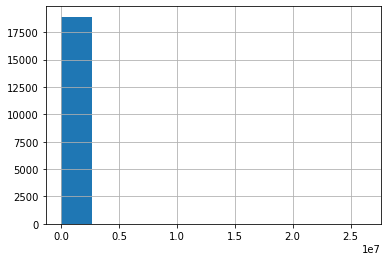

In [61]:
df_num.Price.hist();

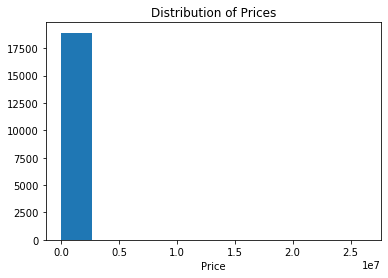

In [62]:
plt.hist(df_num.Price)
plt.xlabel('Price')
plt.title('Distribution of Prices');

In [63]:
df_num.shape

(18924, 5)

#### Prod. year

In [64]:
len(df_num["Prod. year"].value_counts())

54

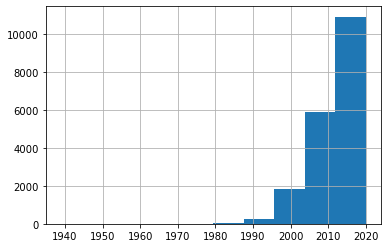

In [65]:
df_num["Prod. year"].hist();

(1980, 2021)

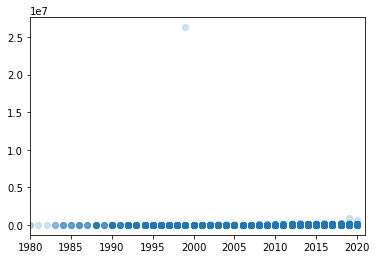

In [66]:
plt.scatter(df_num['Prod. year'],df_num.Price, alpha=0.2)
plt.xlim([1980, 2021])

There seems to be a linear increasing relationship between year and price

#### Mileage

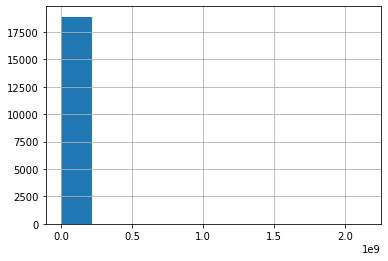

In [67]:
df_num['Mileage'].hist();

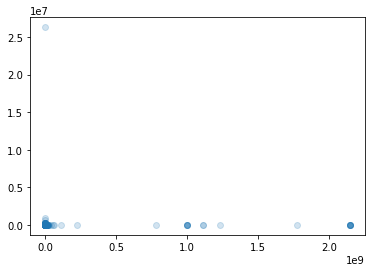

In [68]:
plt.scatter(df_num['Mileage'],df_num.Price, alpha=0.2);


There seems to be a negative correlation between mileage and price

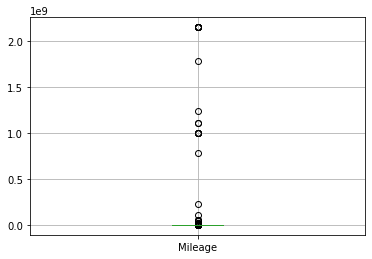

In [69]:
df_num.boxplot('Mileage')

In [70]:
df_num.sort_values('Mileage', ascending=False)

,Price,Prod. year,Mileage,Cylinders,Airbags
ID,,,,,
45346940,6899,1999,2147483647,4.0,4
45332500,10036,2005,2147483647,4.0,12
45761457,3,1995,2147483647,6.0,3
45799423,18817,2003,2147483647,4.0,2
45793107,5959,1995,2147483647,4.0,5
...,...,...,...,...,...
45807457,33556,2015,0,4.0,12
45796360,10976,2014,0,4.0,6
45638142,282,2014,0,4.0,0


#### Cylinders

In [71]:
df_num.Cylinders.value_counts()

4.0     14159
6.0      3373
8.0       976
5.0       169
3.0       107
2.0        42
12.0       38
1.0        37
10.0       12
16.0        5
7.0         4
14.0        1
9.0         1
Name: Cylinders, dtype: int64

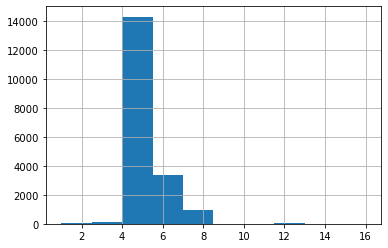

In [72]:
df_num.Cylinders.hist();

#### Airbags

In [73]:
df_num.Airbags.value_counts()

4     5733
12    5534
0     2384
8     1569
6     1289
2     1051
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: Airbags, dtype: int64

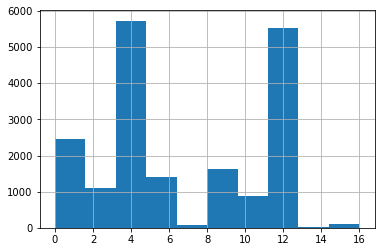

In [74]:
df_num.Airbags.hist();

In [75]:
df_num.shape

(18924, 5)

In [76]:
df_num.head()

,Price,Prod. year,Mileage,Cylinders,Airbags
ID,,,,,
45654403,13328,2010,186005,6.0,12
44731507,16621,2011,192000,6.0,8
45774419,8467,2006,200000,4.0,2
45769185,3607,2011,168966,4.0,0
45809263,11726,2014,91901,4.0,4


In [77]:
y = df_num[['Price']]

In [78]:
X = df_num.drop(columns=['Price'])

# Concatenating obj and num

In [79]:
df_obj.head()

,Levy,Manufacturer,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
ID,,,,,,,,,,,,
45654403,0.707867,20.052594,2.376051,1,1.084548,3.5,1.600473,1.958030,1.719292,2,1.512203,0
44731507,1.142824,14.894874,2.376051,0,1.739115,3.0,2.631358,1.958030,1.719292,2,1.891518,0
45774419,2.150699,14.162074,1.135461,0,1.739115,1.3,1.477050,1.850303,1.719292,1,1.891518,0
45769185,1.181298,15.411850,2.376051,1,1.084548,2.5,1.600473,1.958030,1.719292,2,1.814196,0
45809263,1.956810,14.162074,1.135461,1,1.739115,1.3,1.600473,1.850303,1.719292,2,1.512203,0


In [80]:
X.head()

,Prod. year,Mileage,Cylinders,Airbags
ID,,,,
45654403,2010,186005,6.0,12
44731507,2011,192000,6.0,8
45774419,2006,200000,4.0,2
45769185,2011,168966,4.0,0
45809263,2014,91901,4.0,4


In [81]:
X.shape, df_obj.shape

((18924, 4), (18924, 12))

In [82]:
X = pd.concat([df_obj,X], axis=1, join="inner") 

Standard scaling:

In [83]:
Means = X.mean()
Std = X.std()

In [84]:
def transform(X):
    return (X - Means)/Std

In [85]:
X = transform(X)

In [86]:
X.sort_index(axis=1, inplace=True)

In [87]:
X.head()

,Airbags,Category,Color,Cylinders,Doors,Drive wheels,Engine volume,Fuel type,Gear box type,Leather interior,Levy,Manufacturer,Mileage,Prod. year,Turbo,Wheel
ID,,,,,,,,,,,,,,,,
45654403,1.256644,0.406034,-0.720021,1.182934,-0.210178,1.562017,1.360256,-1.129302,-0.576407,0.614960,-1.180788,0.126280,-0.028060,-0.161362,-0.333285,0.288378
44731507,0.331216,0.406034,0.068098,1.182934,-0.210178,1.562017,0.790515,-0.174499,1.724319,-1.626037,-0.734526,-0.318257,-0.027937,0.015137,-0.333285,0.288378
45774419,-1.056927,-0.567704,0.068098,-0.483423,-0.210178,-0.132797,-1.146606,-0.174499,-0.851863,-1.626037,0.299544,-0.381417,-0.027773,-0.867359,-0.333285,-3.467485
45769185,-1.519641,0.406034,-0.092558,-0.483423,-0.210178,1.562017,0.220773,-1.129302,-0.576407,0.614960,-0.695052,-0.273700,-0.028409,0.015137,-0.333285,0.288378
45809263,-0.594213,-0.567704,-0.720021,-0.483423,-0.210178,-0.132797,-1.146606,-0.174499,-0.576407,0.614960,0.100615,-0.381417,-0.029988,0.544635,-0.333285,0.288378


# Training and testing

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error as msle

In [89]:
def transform_test(df):
    df['Mileage'] = df['Mileage'].apply(lambda x: int(x[:-2]))
    df.set_index('ID', inplace=True)
    
    obj = df.select_dtypes(include='object').copy()
    obj.Levy = obj.Levy.map(map_levy)
    obj.Manufacturer = obj.Manufacturer.map(map_manufac)
    obj.Category = obj.Category.map(map_category)
    obj['Leather interior'] = obj['Leather interior'].map(map_leather)
    obj['Fuel type'] = obj['Fuel type'].map(map_fuel)
    obj['Turbo'] = return_turbo(obj['Engine volume'])
    obj['Engine volume'] = obj['Engine volume'].apply(lambda x: float(x.split()[0]))
    obj['Gear box type'] = obj['Gear box type'].map(map_gear)
    obj['Drive wheels'] = obj['Drive wheels'].map(map_drive)
    obj['Doors'] = obj['Doors'].map(map_doors)
    obj['Wheel'] = obj['Wheel'].map(map_wheel)
    obj['Color'] = obj['Color'].map(map_color)
    obj.drop(columns=['Model'], inplace=True)
    
    num = df.select_dtypes(exclude='object').copy()
    X = pd.concat([num,obj], axis=1)
    
    return transform(X)

In [90]:
def to_X_test(df):
    X_mod = transform_test(df.copy())
    X_mod.drop(columns=['Price'], inplace=True)
    X_mod.fillna(X_mod.median(), inplace=True)
    X_mod.sort_index(axis=1, inplace=True)
    
    return X_mod

In [91]:
def pred_error(model, X, y):
    y_pred = np.exp(model.predict(X))
    return np.sqrt(msle(y,y_pred))

## Linear Regression

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)

In [93]:
X_train.shape, y_train.shape

((17031, 16), (17031, 1))

In [94]:
model = LinearRegression().fit(X_train, np.log(y_train))

In [95]:
pred_error(model, X_train, y_train), pred_error(model, X_val, y_val)

(1.425838456098527, 1.4466133647483754)

### Making Predictions on the test set

In [96]:
df_test = pd.read_csv(test_url)

In [97]:
df_test.shape

(8245, 18)

In [98]:
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [99]:
X_mod = to_X_test(df_test)
X_mod.head()

,Airbags,Category,Color,Cylinders,Doors,Drive wheels,Engine volume,Fuel type,Gear box type,Leather interior,Levy,Manufacturer,Mileage,Prod. year,Turbo,Wheel
ID,,,,,,,,,,,,,,,,
44020629,0.793930,-0.567704,0.136094,-0.483423,4.854044,-0.132797,-0.348968,1.764614,1.624301,-1.626037,0.299544,-0.613290,-0.031871,0.191636,3.000273,0.288378
45784798,0.793930,-0.344155,0.136094,-0.483423,-0.210178,-0.132797,0.106825,-0.174499,1.724319,0.614960,0.299544,0.320499,-0.031338,0.191636,-0.333285,0.288378
45800257,0.331216,-0.344155,-0.936737,-0.483423,-0.210178,-0.132797,-0.918710,-0.174499,-0.576407,-1.626037,0.299544,-0.754289,-0.028428,-1.043858,-0.333285,-3.467485
45797981,1.256644,0.406034,3.208665,1.182934,-0.210178,1.562017,1.018411,-0.174499,-0.576407,0.614960,0.785905,-0.716103,-0.028941,0.191636,-0.333285,0.288378
45814303,-1.519641,-0.567704,0.068098,-0.483423,-0.210178,-0.132797,-0.804761,-0.174499,1.624301,-1.626037,0.299544,4.730684,-0.027773,-3.161848,-0.333285,0.288378


In [100]:
y_pred = np.exp(model.predict(X_mod))

In [101]:
submission = pd.DataFrame({'Price': [x[0] for x in y_pred]})
submission.head()

,Price
0,35373.334144
1,13775.561982
2,4205.980294
3,5379.110861
4,7107.607719


In [102]:
submission.to_csv('my_submission_file.csv', index=False)

## Ridge Regression

In [103]:
from sklearn.linear_model import Ridge

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

In [105]:
rr = Ridge(alpha=5e-1) 

In [106]:
model = rr.fit(X_train, np.log(y_train))

In [107]:
pred_error(model, X_train, y_train), pred_error(model, X_val, y_val)

(1.4259372931487624, 1.4397215300489898)

### Making predictions on test set

In [108]:
X_mod = to_X_test(df_test)

In [109]:
y_pred = np.exp(model.predict(X_mod))

In [110]:
submission = pd.DataFrame({'Price': [x[0] for x in y_pred]})
submission.head()

,Price
0,35257.312261
1,13765.898392
2,4147.456452
3,5452.378071
4,6866.301846


In [111]:
submission.to_csv('my_submission_file.csv', index=False)

## Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

In [113]:
lasso = Lasso(1e-3)
model = lasso.fit(X_train,np.log(y_train))

In [114]:
pred_error(model, X_train, y_train), pred_error(model, X_val, y_val)

(1.4259452200239302, 1.4397372413566545)

## Polynomial Regression

In [116]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(18924, 153)

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.15, random_state=42, shuffle=True)

In [118]:
model = LinearRegression().fit(X_train, np.log(y_train))

In [119]:
pred_error(model, X_train, y_train), pred_error(model, X_val, y_val)

(1.2467195376898401, 1.915029462881452)

### Making Predictions on the test set

In [120]:
X_mod = to_X_test(df_test)
X_mod.head()

,Airbags,Category,Color,Cylinders,Doors,Drive wheels,Engine volume,Fuel type,Gear box type,Leather interior,Levy,Manufacturer,Mileage,Prod. year,Turbo,Wheel
ID,,,,,,,,,,,,,,,,
44020629,0.793930,-0.567704,0.136094,-0.483423,4.854044,-0.132797,-0.348968,1.764614,1.624301,-1.626037,0.299544,-0.613290,-0.031871,0.191636,3.000273,0.288378
45784798,0.793930,-0.344155,0.136094,-0.483423,-0.210178,-0.132797,0.106825,-0.174499,1.724319,0.614960,0.299544,0.320499,-0.031338,0.191636,-0.333285,0.288378
45800257,0.331216,-0.344155,-0.936737,-0.483423,-0.210178,-0.132797,-0.918710,-0.174499,-0.576407,-1.626037,0.299544,-0.754289,-0.028428,-1.043858,-0.333285,-3.467485
45797981,1.256644,0.406034,3.208665,1.182934,-0.210178,1.562017,1.018411,-0.174499,-0.576407,0.614960,0.785905,-0.716103,-0.028941,0.191636,-0.333285,0.288378
45814303,-1.519641,-0.567704,0.068098,-0.483423,-0.210178,-0.132797,-0.804761,-0.174499,1.624301,-1.626037,0.299544,4.730684,-0.027773,-3.161848,-0.333285,0.288378


In [121]:
X_test = poly.fit_transform(X_mod)

In [122]:
y_pred = np.exp(model.predict(X_test))

In [123]:
submission = pd.DataFrame({'Price': [x[0] for x in y_pred]})

In [124]:
submission.sort_values('Price', ascending=False)

,Price
5355,4.127860e+28
2689,2.771523e+22
540,3.952184e+09
2721,1.432485e+06
3018,1.432485e+06
...,...
4961,3.263904e+02
7286,2.887614e+02
7418,9.848449e+01
2608,2.392700e-33


In [125]:
submission.to_csv('my_submission_file.csv', index=False)

## Decision Tree Regressor

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
X_poly.shape

(18924, 969)

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.10, random_state=42, shuffle=True)

In [130]:
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(X_train,np.log(y_train));

In [131]:
pred_error(tree, X_train, y_train), pred_error(tree, X_val, y_val)

(0.8889267158209209, 1.1412731104847234)

## Support Vector Regression

In [132]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(18924, 153)

In [133]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)

In [134]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1, epsilon=1.0, kernel='rbf')

# Training of the regression model
model = svr_rbf.fit(X_train, np.log(y_train))

/home/vibe_bruv/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [135]:
pred_error(svr_rbf, X_train, y_train), pred_error(svr_rbf, X_val, y_val)

(1.171618584089111, 1.200194731132795)

## RandomForest Regressor

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(18924, 153)

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)

In [96]:
X_train.shape, y_train.shape

((17031, 16), (17031, 1))

In [97]:
rfr = RandomForestRegressor(n_estimators=150, criterion='mse', max_depth=25, min_samples_leaf=2)

In [98]:
model = rfr.fit(X_train, np.log(y_train))

<ipython-input-98-e943f1e4fbf8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfr.fit(X_train, np.log(y_train))


In [99]:
pred_error(model, X_train, y_train), pred_error(model, X_val, y_val)

(0.543529938287644, 0.8941421174469428)

**GridSearchCV**

In [110]:
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['mse'],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 3]
}]

gs = GridSearchCV(RandomForestRegressor(),
                  param_grid=params,
                  scoring='neg_mean_squared_log_error',
                  cv=10)

gs.fit(X_train, np.log(y_train.to_numpy()).ravel())
gs.best_params_

{'criterion': 'mse',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [111]:
pred_error(gs, X_train, y_train),pred_error(gs, X_val, y_val) 

(0.5399617497383109, 0.8971151564687483)

In [102]:
importance = model.feature_importances_
res = []
for i,v in enumerate(importance):
    if v >= 0.01: res.append(i)

In [103]:
rfr = RandomForestRegressor(n_estimators=150, criterion='mse', max_depth=25, min_samples_leaf=2)

In [104]:
trial_X = X_train.to_numpy()[:,res]

In [105]:
model2 = rfr.fit(trial_X, np.log(y_train))

<ipython-input-105-262f631fe653>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2 = rfr.fit(trial_X, np.log(y_train))


In [106]:
pred_error(model2, trial_X, y_train), pred_error(model2, X_val.to_numpy()[:,res], y_val)

(0.5439317731730223, 0.8903204633151085)

### Making predictions on test set

In [148]:
X_mod = to_X_test(df_test)
y_pred = np.exp(model2.predict(X_mod.to_numpy()[:,res]))
submission = pd.DataFrame({'Price': [x for x in y_pred]})
submission.head()

,Price
0,15638.922348
1,6332.107483
2,6436.943721
3,3649.462305
4,2603.857904


In [149]:
submission.to_csv('../data/mathco/mathco_submission.csv', index=False)